This notebook was inspired by neural network & machine learning labs led by [GMUM](https://gmum.net/).

See also [CS231n: Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/convolutional-networks/) (what's below mostly follows this) and [Chapter 9](https://www.deeplearningbook.org/contents/convnets.html) (especially 9.2 *Motivation* and 9.3 *Pooling*) of the Deep Learning book.

In [1]:
from itertools import product

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import torch

An image of a frog from the CIFAR-10 dataset which we'll be using today.

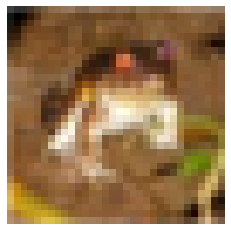

In [2]:
np_image = np.array([[[0.23137255012989044, 0.16862745583057404, 0.19607843458652496, 0.2666666805744171, 0.3843137323856354, 0.46666666865348816, 0.545098066329956, 0.5686274766921997, 0.5843137502670288, 0.5843137502670288, 0.5137255191802979, 0.4901960790157318, 0.5568627715110779, 0.5647059082984924, 0.5372549295425415, 0.5058823823928833, 0.5372549295425415, 0.5254902243614197, 0.48627451062202454, 0.545098066329956, 0.545098066329956, 0.5215686559677124, 0.5333333611488342, 0.545098066329956, 0.5960784554481506, 0.6392157077789307, 0.658823549747467, 0.6235294342041016, 0.6196078658103943, 0.6196078658103943, 0.5960784554481506, 0.5803921818733215], [0.062745101749897, 0.0, 0.07058823853731155, 0.20000000298023224, 0.3450980484485626, 0.47058823704719543, 0.501960813999176, 0.49803921580314636, 0.4941176474094391, 0.45490196347236633, 0.4156862795352936, 0.3960784375667572, 0.4117647111415863, 0.4431372582912445, 0.4274509847164154, 0.43921568989753723, 0.46666666865348816, 0.4274509847164154, 0.4117647111415863, 0.4901960790157318, 0.49803921580314636, 0.47843137383461, 0.5137255191802979, 0.48627451062202454, 0.4745098054409027, 0.5137255191802979, 0.5176470875740051, 0.5215686559677124, 0.5215686559677124, 0.48235294222831726, 0.46666666865348816, 0.47843137383461], [0.09803921729326248, 0.062745101749897, 0.1921568661928177, 0.32549020648002625, 0.4313725531101227, 0.5058823823928833, 0.5098039507865906, 0.4745098054409027, 0.4431372582912445, 0.43921568989753723, 0.43921568989753723, 0.4156862795352936, 0.4117647111415863, 0.501960813999176, 0.48627451062202454, 0.5098039507865906, 0.49803921580314636, 0.47843137383461, 0.45098039507865906, 0.47058823704719543, 0.5098039507865906, 0.5137255191802979, 0.545098066329956, 0.49803921580314636, 0.4941176474094391, 0.49803921580314636, 0.5098039507865906, 0.5568627715110779, 0.5098039507865906, 0.4627451002597809, 0.47058823704719543, 0.4274509847164154], [0.12941177189350128, 0.14901961386203766, 0.34117648005485535, 0.4156862795352936, 0.45098039507865906, 0.4588235318660736, 0.4470588266849518, 0.4117647111415863, 0.41960784792900085, 0.4745098054409027, 0.4901960790157318, 0.4274509847164154, 0.4431372582912445, 0.572549045085907, 0.5215686559677124, 0.49803921580314636, 0.4627451002597809, 0.4588235318660736, 0.49803921580314636, 0.47843137383461, 0.5176470875740051, 0.5372549295425415, 0.5333333611488342, 0.5137255191802979, 0.48627451062202454, 0.5098039507865906, 0.5176470875740051, 0.529411792755127, 0.5098039507865906, 0.4901960790157318, 0.4745098054409027, 0.3686274588108063], [0.19607843458652496, 0.23137255012989044, 0.4000000059604645, 0.49803921580314636, 0.48627451062202454, 0.4745098054409027, 0.47058823704719543, 0.4470588266849518, 0.41960784792900085, 0.4901960790157318, 0.5058823823928833, 0.4156862795352936, 0.42352941632270813, 0.48627451062202454, 0.4745098054409027, 0.42352941632270813, 0.3843137323856354, 0.4313725531101227, 0.4588235318660736, 0.47058823704719543, 0.5254902243614197, 0.5490196347236633, 0.5137255191802979, 0.5529412031173706, 0.529411792755127, 0.49803921580314636, 0.4745098054409027, 0.46666666865348816, 0.40392157435417175, 0.34117648005485535, 0.29411765933036804, 0.26274511218070984], [0.27843138575553894, 0.3294117748737335, 0.4313725531101227, 0.5058823823928833, 0.5333333611488342, 0.5137255191802979, 0.5058823823928833, 0.46666666865348816, 0.42352941632270813, 0.47843137383461, 0.48235294222831726, 0.4117647111415863, 0.41960784792900085, 0.43529412150382996, 0.42352941632270813, 0.3843137323856354, 0.3686274588108063, 0.3803921639919281, 0.32549020648002625, 0.3450980484485626, 0.4000000059604645, 0.3803921639919281, 0.3450980484485626, 0.4627451002597809, 0.5490196347236633, 0.5333333611488342, 0.47058823704719543, 0.41960784792900085, 0.3450980484485626, 0.26274511218070984, 0.13725490868091583, 0.125490203499794], [0.3803921639919281, 0.43529412150382996, 0.48235294222831726, 0.5098039507865906, 0.5333333611488342, 0.5176470875740051, 0.47843137383461, 0.4745098054409027, 0.49803921580314636, 0.5411764979362488, 0.48627451062202454, 0.47058823704719543, 0.41960784792900085, 0.3137255012989044, 0.2666666805744171, 0.29019609093666077, 0.3960784375667572, 0.4117647111415863, 0.2549019753932953, 0.22745098173618317, 0.24705882370471954, 0.30588236451148987, 0.5333333611488342, 0.47843137383461, 0.545098066329956, 0.5921568870544434, 0.5058823823928833, 0.42352941632270813, 0.37254902720451355, 0.3764705955982208, 0.3490196168422699, 0.25882354378700256], [0.45098039507865906, 0.46666666865348816, 0.5098039507865906, 0.5490196347236633, 0.5215686559677124, 0.49803921580314636, 0.5411764979362488, 0.5372549295425415, 0.5137255191802979, 0.5215686559677124, 0.5254902243614197, 0.42352941632270813, 0.2823529541492462, 0.20000000298023224, 0.16078431904315948, 0.2823529541492462, 0.7098039388656616, 0.8196078538894653, 0.4901960790157318, 0.2666666805744171, 0.250980406999588, 0.32156863808631897, 0.48235294222831726, 0.43921568989753723, 0.529411792755127, 0.5921568870544434, 0.5372549295425415, 0.4470588266849518, 0.4117647111415863, 0.3960784375667572, 0.4941176474094391, 0.4000000059604645], [0.5372549295425415, 0.501960813999176, 0.5176470875740051, 0.501960813999176, 0.46666666865348816, 0.48235294222831726, 0.501960813999176, 0.5098039507865906, 0.4745098054409027, 0.5372549295425415, 0.5137255191802979, 0.29019609093666077, 0.21176470816135406, 0.19607843458652496, 0.1725490242242813, 0.33725491166114807, 0.7960784435272217, 0.8509804010391235, 0.6352941393852234, 0.3921568691730499, 0.3019607961177826, 0.29411765933036804, 0.29019609093666077, 0.2980392277240753, 0.41960784792900085, 0.529411792755127, 0.529411792755127, 0.5058823823928833, 0.49803921580314636, 0.46666666865348816, 0.4901960790157318, 0.5254902243614197], [0.6039215922355652, 0.6039215922355652, 0.6117647290229797, 0.5490196347236633, 0.48235294222831726, 0.4901960790157318, 0.4941176474094391, 0.49803921580314636, 0.5215686559677124, 0.5176470875740051, 0.3529411852359772, 0.24705882370471954, 0.24313725531101227, 0.27450981736183167, 0.30980393290519714, 0.40392157435417175, 0.5960784554481506, 0.5803921818733215, 0.5529412031173706, 0.4745098054409027, 0.3960784375667572, 0.3764705955982208, 0.33725491166114807, 0.29411765933036804, 0.3960784375667572, 0.5333333611488342, 0.5333333611488342, 0.5254902243614197, 0.5215686559677124, 0.5176470875740051, 0.501960813999176, 0.5215686559677124], [0.6039215922355652, 0.6078431606292725, 0.6117647290229797, 0.5764706134796143, 0.5215686559677124, 0.5372549295425415, 0.545098066329956, 0.5254902243614197, 0.5529412031173706, 0.4745098054409027, 0.3137255012989044, 0.3803921639919281, 0.3529411852359772, 0.3843137323856354, 0.5372549295425415, 0.545098066329956, 0.5803921818733215, 0.5254902243614197, 0.5411764979362488, 0.5254902243614197, 0.5490196347236633, 0.686274528503418, 0.5568627715110779, 0.4000000059604645, 0.42352941632270813, 0.529411792755127, 0.5137255191802979, 0.5215686559677124, 0.5411764979362488, 0.5333333611488342, 0.5098039507865906, 0.5254902243614197], [0.5686274766921997, 0.572549045085907, 0.572549045085907, 0.529411792755127, 0.49803921580314636, 0.5058823823928833, 0.4588235318660736, 0.40392157435417175, 0.5098039507865906, 0.47058823704719543, 0.43529412150382996, 0.572549045085907, 0.5333333611488342, 0.6392157077789307, 0.6627451181411743, 0.5960784554481506, 0.6313725709915161, 0.5803921818733215, 0.6941176652908325, 0.6313725709915161, 0.7647058963775635, 0.8196078538894653, 0.7411764860153198, 0.4901960790157318, 0.42352941632270813, 0.5490196347236633, 0.5372549295425415, 0.5176470875740051, 0.5333333611488342, 0.5215686559677124, 0.5176470875740051, 0.5215686559677124], [0.5568627715110779, 0.5529412031173706, 0.5490196347236633, 0.5647059082984924, 0.5764706134796143, 0.4745098054409027, 0.3294117748737335, 0.3450980484485626, 0.4274509847164154, 0.3960784375667572, 0.5411764979362488, 0.8352941274642944, 0.6980392336845398, 0.7490196228027344, 0.8274509906768799, 0.7411764860153198, 0.8039215803146362, 0.8117647171020508, 0.8352941274642944, 0.7490196228027344, 0.7803921699523926, 0.7372549176216125, 0.6313725709915161, 0.5098039507865906, 0.48627451062202454, 0.5137255191802979, 0.5098039507865906, 0.5137255191802979, 0.5254902243614197, 0.529411792755127, 0.5333333611488342, 0.5215686559677124], [0.6196078658103943, 0.6039215922355652, 0.5568627715110779, 0.5607843399047852, 0.5176470875740051, 0.3529411852359772, 0.2823529541492462, 0.3176470696926117, 0.3294117748737335, 0.41960784792900085, 0.6470588445663452, 0.8980392217636108, 0.7176470756530762, 0.7490196228027344, 0.9372549057006836, 0.8588235378265381, 0.8941176533699036, 0.8823529481887817, 0.8392156958580017, 0.8470588326454163, 0.8235294222831726, 0.7843137383460999, 0.7411764860153198, 0.6823529601097107, 0.6313725709915161, 0.545098066329956, 0.5254902243614197, 0.4941176474094391, 0.5137255191802979, 0.5568627715110779, 0.5333333611488342, 0.5411764979362488], [0.5686274766921997, 0.5843137502670288, 0.5764706134796143, 0.5764706134796143, 0.5333333611488342, 0.3137255012989044, 0.3490196168422699, 0.4117647111415863, 0.3764705955982208, 0.5058823823928833, 0.7529411911964417, 0.7254902124404907, 0.5686274766921997, 0.7960784435272217, 0.8745098114013672, 0.9490196108818054, 0.95686274766922, 0.9333333373069763, 0.9450980424880981, 0.8901960849761963, 0.8823529481887817, 0.9215686321258545, 0.8588235378265381, 0.8784313797950745, 0.843137264251709, 0.6117647290229797, 0.501960813999176, 0.5058823823928833, 0.5137255191802979, 0.5215686559677124, 0.501960813999176, 0.5098039507865906], [0.5803921818733215, 0.572549045085907, 0.5686274766921997, 0.5764706134796143, 0.5215686559677124, 0.24705882370471954, 0.25882354378700256, 0.3450980484485626, 0.4431372582912445, 0.7137255072593689, 0.8627451062202454, 0.5411764979362488, 0.6352941393852234, 0.8078431487083435, 0.7686274647712708, 0.9686274528503418, 1.0, 1.0, 0.9607843160629272, 0.9254902005195618, 0.9019607901573181, 0.843137264251709, 0.9058823585510254, 0.9803921580314636, 0.9450980424880981, 0.6196078658103943, 0.4901960790157318, 0.4941176474094391, 0.48627451062202454, 0.4901960790157318, 0.4941176474094391, 0.48627451062202454], [0.5843137502670288, 0.5607843399047852, 0.5647059082984924, 0.5921568870544434, 0.5176470875740051, 0.250980406999588, 0.3294117748737335, 0.43921568989753723, 0.6392157077789307, 0.8745098114013672, 0.8078431487083435, 0.5686274766921997, 0.7686274647712708, 0.800000011920929, 0.8627451062202454, 0.9529411792755127, 0.9607843160629272, 0.9372549057006836, 0.9176470637321472, 0.9058823585510254, 0.7647058963775635, 0.5882353186607361, 0.8156862854957581, 0.9803921580314636, 0.8901960849761963, 0.6392157077789307, 0.5686274766921997, 0.5607843399047852, 0.5490196347236633, 0.5333333611488342, 0.4745098054409027, 0.4470588266849518], [0.5764706134796143, 0.5254902243614197, 0.5490196347236633, 0.5803921818733215, 0.529411792755127, 0.3921568691730499, 0.42352941632270813, 0.5647059082984924, 0.8235294222831726, 0.9725490212440491, 0.686274528503418, 0.686274528503418, 0.8627451062202454, 0.886274516582489, 0.9019607901573181, 0.9137254953384399, 0.8784313797950745, 0.7882353067398071, 0.7215686440467834, 0.7098039388656616, 0.7450980544090271, 0.6666666865348816, 0.7019608020782471, 0.9058823585510254, 0.8745098114013672, 0.6352941393852234, 0.572549045085907, 0.5490196347236633, 0.545098066329956, 0.5686274766921997, 0.5568627715110779, 0.501960813999176], [0.5960784554481506, 0.4588235318660736, 0.4470588266849518, 0.48235294222831726, 0.4941176474094391, 0.47843137383461, 0.364705890417099, 0.7019608020782471, 0.9333333373069763, 0.9725490212440491, 0.6666666865348816, 0.7254902124404907, 0.9450980424880981, 0.9019607901573181, 0.7333333492279053, 0.7058823704719543, 0.6509804129600525, 0.572549045085907, 0.5843137502670288, 0.615686297416687, 0.7215686440467834, 0.8470588326454163, 0.8313725590705872, 0.9254902005195618, 0.9254902005195618, 0.6509804129600525, 0.5333333611488342, 0.5254902243614197, 0.5098039507865906, 0.49803921580314636, 0.5372549295425415, 0.5921568870544434], [0.5686274766921997, 0.49803921580314636, 0.501960813999176, 0.5215686559677124, 0.5176470875740051, 0.529411792755127, 0.6705882549285889, 0.929411768913269, 0.9882352948188782, 0.8980392217636108, 0.6784313917160034, 0.6627451181411743, 0.8627451062202454, 0.7607843279838562, 0.48235294222831726, 0.529411792755127, 0.49803921580314636, 0.5921568870544434, 0.6470588445663452, 0.5176470875740051, 0.5921568870544434, 0.7921568751335144, 0.9411764740943909, 0.9411764740943909, 0.8705882430076599, 0.6117647290229797, 0.46666666865348816, 0.47058823704719543, 0.43921568989753723, 0.3921568691730499, 0.38823530077934265, 0.5490196347236633], [0.5607843399047852, 0.49803921580314636, 0.5058823823928833, 0.5058823823928833, 0.5098039507865906, 0.5490196347236633, 0.8588235378265381, 0.95686274766922, 0.8235294222831726, 0.7568627595901489, 0.6509804129600525, 0.6000000238418579, 0.7490196228027344, 0.7019608020782471, 0.501960813999176, 0.5764706134796143, 0.5843137502670288, 0.6745098233222961, 0.5764706134796143, 0.501960813999176, 0.5529412031173706, 0.6784313917160034, 0.7921568751335144, 0.7450980544090271, 0.7764706015586853, 0.5960784554481506, 0.3921568691730499, 0.4274509847164154, 0.46666666865348816, 0.4745098054409027, 0.42352941632270813, 0.5333333611488342], [0.5607843399047852, 0.4901960790157318, 0.5137255191802979, 0.501960813999176, 0.48235294222831726, 0.6000000238418579, 0.5803921818733215, 0.6509804129600525, 0.7372549176216125, 0.7137255072593689, 0.6705882549285889, 0.6470588445663452, 0.7647058963775635, 0.7450980544090271, 0.5960784554481506, 0.5607843399047852, 0.5960784554481506, 0.6000000238418579, 0.5568627715110779, 0.5529412031173706, 0.529411792755127, 0.5333333611488342, 0.5803921818733215, 0.5529412031173706, 0.5529412031173706, 0.5411764979362488, 0.43529412150382996, 0.43529412150382996, 0.4745098054409027, 0.5058823823928833, 0.5411764979362488, 0.7019608020782471], [0.5529412031173706, 0.5137255191802979, 0.545098066329956, 0.545098066329956, 0.5411764979362488, 0.5921568870544434, 0.501960813999176, 0.5333333611488342, 0.686274528503418, 0.6784313917160034, 0.7411764860153198, 0.8039215803146362, 0.7882353067398071, 0.658823549747467, 0.5921568870544434, 0.5686274766921997, 0.572549045085907, 0.5843137502670288, 0.6000000238418579, 0.5843137502670288, 0.5647059082984924, 0.5647059082984924, 0.5686274766921997, 0.5607843399047852, 0.5058823823928833, 0.48235294222831726, 0.48627451062202454, 0.4431372582912445, 0.42352941632270813, 0.4431372582912445, 0.5803921818733215, 0.7803921699523926], [0.5607843399047852, 0.545098066329956, 0.5411764979362488, 0.5843137502670288, 0.6274510025978088, 0.5882353186607361, 0.5764706134796143, 0.5921568870544434, 0.6627451181411743, 0.6549019813537598, 0.7019608020782471, 0.8313725590705872, 0.7960784435272217, 0.8117647171020508, 0.5843137502670288, 0.545098066329956, 0.5647059082984924, 0.5372549295425415, 0.5921568870544434, 0.6078431606292725, 0.5960784554481506, 0.5490196347236633, 0.41960784792900085, 0.35686275362968445, 0.3294117748737335, 0.4117647111415863, 0.5176470875740051, 0.4627451002597809, 0.3764705955982208, 0.4000000059604645, 0.6235294342041016, 0.7450980544090271], [0.5843137502670288, 0.5215686559677124, 0.5333333611488342, 0.5764706134796143, 0.5882353186607361, 0.6000000238418579, 0.615686297416687, 0.6352941393852234, 0.686274528503418, 0.7450980544090271, 0.6509804129600525, 0.7921568751335144, 0.8784313797950745, 0.772549033164978, 0.7529411911964417, 0.7058823704719543, 0.572549045085907, 0.4941176474094391, 0.5529412031173706, 0.6117647290229797, 0.6000000238418579, 0.45098039507865906, 0.3019607961177826, 0.30980393290519714, 0.364705890417099, 0.4941176474094391, 0.5215686559677124, 0.46666666865348816, 0.4431372582912445, 0.5490196347236633, 0.7333333492279053, 0.6039215922355652], [0.6745098233222961, 0.5647059082984924, 0.529411792755127, 0.5333333611488342, 0.529411792755127, 0.545098066329956, 0.6000000238418579, 0.6392157077789307, 0.6509804129600525, 0.7215686440467834, 0.6509804129600525, 0.5882353186607361, 0.7215686440467834, 0.6117647290229797, 0.6196078658103943, 0.658823549747467, 0.5843137502670288, 0.529411792755127, 0.5098039507865906, 0.5176470875740051, 0.501960813999176, 0.49803921580314636, 0.529411792755127, 0.5607843399047852, 0.545098066329956, 0.5333333611488342, 0.49803921580314636, 0.4745098054409027, 0.529411792755127, 0.7411764860153198, 0.8274509906768799, 0.5333333611488342], [0.7921568751335144, 0.7333333492279053, 0.5921568870544434, 0.501960813999176, 0.47843137383461, 0.5254902243614197, 0.5568627715110779, 0.5882353186607361, 0.6000000238418579, 0.5803921818733215, 0.529411792755127, 0.49803921580314636, 0.6000000238418579, 0.6509804129600525, 0.5607843399047852, 0.5098039507865906, 0.501960813999176, 0.5921568870544434, 0.5960784554481506, 0.529411792755127, 0.545098066329956, 0.6078431606292725, 0.6313725709915161, 0.6039215922355652, 0.6039215922355652, 0.5607843399047852, 0.5098039507865906, 0.5176470875740051, 0.6705882549285889, 0.843137264251709, 0.729411780834198, 0.4588235318660736], [0.8470588326454163, 0.7568627595901489, 0.658823549747467, 0.5921568870544434, 0.5137255191802979, 0.4941176474094391, 0.5411764979362488, 0.5647059082984924, 0.5568627715110779, 0.5372549295425415, 0.47058823704719543, 0.5137255191802979, 0.5686274766921997, 0.5647059082984924, 0.5372549295425415, 0.49803921580314636, 0.4941176474094391, 0.545098066329956, 0.6000000238418579, 0.5843137502670288, 0.5490196347236633, 0.529411792755127, 0.5764706134796143, 0.5803921818733215, 0.5843137502670288, 0.5843137502670288, 0.5372549295425415, 0.5607843399047852, 0.7960784435272217, 0.8078431487083435, 0.48627451062202454, 0.27843138575553894], [0.8627451062202454, 0.7882353067398071, 0.729411780834198, 0.6745098233222961, 0.6117647290229797, 0.5568627715110779, 0.5568627715110779, 0.6000000238418579, 0.5882353186607361, 0.545098066329956, 0.4941176474094391, 0.5333333611488342, 0.5803921818733215, 0.5529412031173706, 0.5137255191802979, 0.4941176474094391, 0.49803921580314636, 0.5411764979362488, 0.5882353186607361, 0.6039215922355652, 0.5843137502670288, 0.48627451062202454, 0.4941176474094391, 0.5529412031173706, 0.5686274766921997, 0.5764706134796143, 0.49803921580314636, 0.4470588266849518, 0.729411780834198, 0.6784313917160034, 0.21960784494876862, 0.12941177189350128], [0.8156862854957581, 0.7882353067398071, 0.7764706015586853, 0.7490196228027344, 0.7176470756530762, 0.6705882549285889, 0.6235294342041016, 0.5764706134796143, 0.529411792755127, 0.5098039507865906, 0.545098066329956, 0.5764706134796143, 0.5647059082984924, 0.5686274766921997, 0.5372549295425415, 0.5333333611488342, 0.5372549295425415, 0.5803921818733215, 0.5960784554481506, 0.5882353186607361, 0.6078431606292725, 0.5411764979362488, 0.47058823704719543, 0.501960813999176, 0.5568627715110779, 0.529411792755127, 0.3529411852359772, 0.19607843458652496, 0.5372549295425415, 0.6274510025978088, 0.21960784494876862, 0.2078431397676468], [0.7058823704719543, 0.6784313917160034, 0.729411780834198, 0.7607843279838562, 0.7764706015586853, 0.7882353067398071, 0.7411764860153198, 0.6784313917160034, 0.6117647290229797, 0.545098066329956, 0.5568627715110779, 0.5686274766921997, 0.5529412031173706, 0.5529412031173706, 0.545098066329956, 0.5490196347236633, 0.5607843399047852, 0.545098066329956, 0.5411764979362488, 0.5607843399047852, 0.572549045085907, 0.529411792755127, 0.4588235318660736, 0.43921568989753723, 0.47843137383461, 0.40784314274787903, 0.22745098173618317, 0.13333334028720856, 0.5137255191802979, 0.7215686440467834, 0.3803921639919281, 0.32549020648002625], [0.6941176652908325, 0.658823549747467, 0.7019608020782471, 0.7372549176216125, 0.7921568751335144, 0.8549019694328308, 0.8549019694328308, 0.8117647171020508, 0.7490196228027344, 0.686274528503418, 0.6509804129600525, 0.6392157077789307, 0.6392157077789307, 0.6313725709915161, 0.6000000238418579, 0.6235294342041016, 0.6352941393852234, 0.5843137502670288, 0.5490196347236633, 0.5803921818733215, 0.6313725709915161, 0.5647059082984924, 0.43921568989753723, 0.46666666865348816, 0.5098039507865906, 0.47058823704719543, 0.3607843220233917, 0.40392157435417175, 0.6666666865348816, 0.8470588326454163, 0.5921568870544434, 0.48235294222831726]], [[0.24313725531101227, 0.18039216101169586, 0.1882352977991104, 0.21176470816135406, 0.2862745225429535, 0.35686275362968445, 0.41960784792900085, 0.4313725531101227, 0.4588235318660736, 0.47058823704719543, 0.40392157435417175, 0.38823530077934265, 0.45098039507865906, 0.43921568989753723, 0.4117647111415863, 0.3803921639919281, 0.4156862795352936, 0.4156862795352936, 0.3803921639919281, 0.4431372582912445, 0.43921568989753723, 0.4117647111415863, 0.4117647111415863, 0.42352941632270813, 0.47058823704719543, 0.5137255191802979, 0.5333333611488342, 0.5058823823928833, 0.5098039507865906, 0.5176470875740051, 0.4901960790157318, 0.48627451062202454], [0.0784313753247261, 0.0, 0.0313725508749485, 0.10588235408067703, 0.20000000298023224, 0.32156863808631897, 0.3490196168422699, 0.33725491166114807, 0.34117648005485535, 0.30980393290519714, 0.27450981736183167, 0.26274511218070984, 0.27450981736183167, 0.29019609093666077, 0.27450981736183167, 0.2823529541492462, 0.30980393290519714, 0.27843138575553894, 0.2705882489681244, 0.3490196168422699, 0.3607843220233917, 0.3333333432674408, 0.3490196168422699, 0.32156863808631897, 0.30980393290519714, 0.3490196168422699, 0.35686275362968445, 0.3686274588108063, 0.3764705955982208, 0.3450980484485626, 0.32549020648002625, 0.34117648005485535], [0.0941176488995552, 0.027450980618596077, 0.10588235408067703, 0.19607843458652496, 0.2823529541492462, 0.3607843220233917, 0.364705890417099, 0.32156863808631897, 0.3019607961177826, 0.30588236451148987, 0.30980393290519714, 0.29411765933036804, 0.2862745225429535, 0.3607843220233917, 0.34117648005485535, 0.3607843220233917, 0.3490196168422699, 0.3333333432674408, 0.30980393290519714, 0.3333333432674408, 0.37254902720451355, 0.3764705955982208, 0.4000000059604645, 0.3529411852359772, 0.3490196168422699, 0.3490196168422699, 0.3607843220233917, 0.4117647111415863, 0.3686274588108063, 0.3294117748737335, 0.3294117748737335, 0.2862745225429535], [0.09803921729326248, 0.0784313753247261, 0.21176470816135406, 0.24705882370471954, 0.27450981736183167, 0.29019609093666077, 0.2823529541492462, 0.24313725531101227, 0.2666666805744171, 0.3294117748737335, 0.3529411852359772, 0.29411765933036804, 0.3019607961177826, 0.4117647111415863, 0.35686275362968445, 0.3294117748737335, 0.2980392277240753, 0.2980392277240753, 0.34117648005485535, 0.3176470696926117, 0.3607843220233917, 0.38823530077934265, 0.38823530077934265, 0.364705890417099, 0.33725491166114807, 0.35686275362968445, 0.3529411852359772, 0.364705890417099, 0.3529411852359772, 0.34117648005485535, 0.3333333432674408, 0.24313725531101227], [0.125490203499794, 0.125490203499794, 0.2549019753932953, 0.30980393290519714, 0.3019607961177826, 0.3019607961177826, 0.30588236451148987, 0.29019609093666077, 0.2823529541492462, 0.3450980484485626, 0.3490196168422699, 0.2666666805744171, 0.27843138575553894, 0.32549020648002625, 0.30588236451148987, 0.2666666805744171, 0.2549019753932953, 0.29019609093666077, 0.3137255012989044, 0.3137255012989044, 0.364705890417099, 0.4156862795352936, 0.37254902720451355, 0.3843137323856354, 0.3607843220233917, 0.3294117748737335, 0.30980393290519714, 0.30980393290519714, 0.26274511218070984, 0.2235294133424759, 0.18431372940540314, 0.16470588743686676], [0.1882352977991104, 0.2078431397676468, 0.2862745225429535, 0.32156863808631897, 0.3450980484485626, 0.3294117748737335, 0.3294117748737335, 0.3019607961177826, 0.27450981736183167, 0.32156863808631897, 0.3176470696926117, 0.2549019753932953, 0.2823529541492462, 0.3019607961177826, 0.29019609093666077, 0.2549019753932953, 0.24313725531101227, 0.24705882370471954, 0.21960784494876862, 0.22745098173618317, 0.2666666805744171, 0.2705882489681244, 0.21176470816135406, 0.29019609093666077, 0.3764705955982208, 0.3803921639919281, 0.3137255012989044, 0.2666666805744171, 0.21176470816135406, 0.15294118225574493, 0.03921568766236305, 0.05098039284348488], [0.2705882489681244, 0.29411765933036804, 0.3333333432674408, 0.3294117748737335, 0.3450980484485626, 0.32549020648002625, 0.29019609093666077, 0.29019609093666077, 0.32549020648002625, 0.3686274588108063, 0.30980393290519714, 0.30980393290519714, 0.27843138575553894, 0.19607843458652496, 0.16862745583057404, 0.16078431904315948, 0.20000000298023224, 0.21960784494876862, 0.14509804546833038, 0.1411764770746231, 0.14509804546833038, 0.20000000298023224, 0.364705890417099, 0.2666666805744171, 0.33725491166114807, 0.4156862795352936, 0.34117648005485535, 0.2666666805744171, 0.23137255012989044, 0.24705882370471954, 0.239215686917305, 0.18431372940540314], [0.32156863808631897, 0.2980392277240753, 0.3529411852359772, 0.3803921639919281, 0.3450980484485626, 0.3176470696926117, 0.3529411852359772, 0.3490196168422699, 0.33725491166114807, 0.3490196168422699, 0.35686275362968445, 0.27450981736183167, 0.15294118225574493, 0.10196078568696976, 0.08627451211214066, 0.12156862765550613, 0.4000000059604645, 0.49803921580314636, 0.2980392277240753, 0.1568627506494522, 0.14901961386203766, 0.2078431397676468, 0.3019607961177826, 0.21960784494876862, 0.3176470696926117, 0.40392157435417175, 0.37254902720451355, 0.2980392277240753, 0.2705882489681244, 0.25882354378700256, 0.3607843220233917, 0.29019609093666077], [0.3921568691730499, 0.32156863808631897, 0.35686275362968445, 0.34117648005485535, 0.3176470696926117, 0.32156863808631897, 0.3333333432674408, 0.3333333432674408, 0.3137255012989044, 0.3803921639919281, 0.3686274588108063, 0.16470588743686676, 0.09803921729326248, 0.11372549086809158, 0.11372549086809158, 0.15294118225574493, 0.4156862795352936, 0.4274509847164154, 0.3529411852359772, 0.22745098173618317, 0.16470588743686676, 0.16862745583057404, 0.15294118225574493, 0.13725490868091583, 0.26274511218070984, 0.3764705955982208, 0.3803921639919281, 0.35686275362968445, 0.3490196168422699, 0.32549020648002625, 0.33725491166114807, 0.37254902720451355], [0.47058823704719543, 0.43921568989753723, 0.4470588266849518, 0.3921568691730499, 0.3490196168422699, 0.33725491166114807, 0.33725491166114807, 0.35686275362968445, 0.3803921639919281, 0.3803921639919281, 0.23529411852359772, 0.13725490868091583, 0.12941177189350128, 0.15294118225574493, 0.19607843458652496, 0.2078431397676468, 0.27450981736183167, 0.250980406999588, 0.30980393290519714, 0.29411765933036804, 0.22745098173618317, 0.21176470816135406, 0.1882352977991104, 0.14901961386203766, 0.24705882370471954, 0.35686275362968445, 0.3607843220233917, 0.364705890417099, 0.364705890417099, 0.364705890417099, 0.33725491166114807, 0.3607843220233917], [0.47843137383461, 0.4588235318660736, 0.4588235318660736, 0.42352941632270813, 0.3921568691730499, 0.3921568691730499, 0.4000000059604645, 0.4000000059604645, 0.43529412150382996, 0.34117648005485535, 0.1568627506494522, 0.2078431397676468, 0.1764705926179886, 0.21960784494876862, 0.35686275362968445, 0.3294117748737335, 0.34117648005485535, 0.2862745225429535, 0.32156863808631897, 0.3333333432674408, 0.3607843220233917, 0.5058823823928833, 0.38823530077934265, 0.239215686917305, 0.26274511218070984, 0.3529411852359772, 0.34117648005485535, 0.35686275362968445, 0.3803921639919281, 0.37254902720451355, 0.33725491166114807, 0.364705890417099], [0.4470588266849518, 0.4274509847164154, 0.4274509847164154, 0.3803921639919281, 0.3607843220233917, 0.3686274588108063, 0.3294117748737335, 0.29019609093666077, 0.40392157435417175, 0.32549020648002625, 0.23529411852359772, 0.33725491166114807, 0.30588236451148987, 0.45490196347236633, 0.45098039507865906, 0.3921568691730499, 0.45490196347236633, 0.3803921639919281, 0.4745098054409027, 0.4313725531101227, 0.5882353186607361, 0.6549019813537598, 0.572549045085907, 0.30588236451148987, 0.24705882370471954, 0.3764705955982208, 0.37254902720451355, 0.364705890417099, 0.37254902720451355, 0.3529411852359772, 0.34117648005485535, 0.3607843220233917], [0.45098039507865906, 0.4156862795352936, 0.4117647111415863, 0.4117647111415863, 0.4313725531101227, 0.3490196168422699, 0.21960784494876862, 0.239215686917305, 0.3137255012989044, 0.2235294133424759, 0.30980393290519714, 0.5882353186607361, 0.48235294222831726, 0.5882353186607361, 0.6627451181411743, 0.5803921818733215, 0.6431372761726379, 0.6352941393852234, 0.6431372761726379, 0.5607843399047852, 0.6196078658103943, 0.5921568870544434, 0.4745098054409027, 0.32549020648002625, 0.3019607961177826, 0.34117648005485535, 0.35686275362968445, 0.364705890417099, 0.364705890417099, 0.35686275362968445, 0.3490196168422699, 0.35686275362968445], [0.5137255191802979, 0.46666666865348816, 0.41960784792900085, 0.4000000059604645, 0.3607843220233917, 0.23137255012989044, 0.1725490242242813, 0.20392157137393951, 0.18431372940540314, 0.21568627655506134, 0.4156862795352936, 0.6901960968971252, 0.5372549295425415, 0.6196078658103943, 0.8470588326454163, 0.7529411911964417, 0.7372549176216125, 0.7372549176216125, 0.6941176652908325, 0.6823529601097107, 0.6705882549285889, 0.6627451181411743, 0.6352941393852234, 0.5372549295425415, 0.4627451002597809, 0.37254902720451355, 0.3764705955982208, 0.3529411852359772, 0.3607843220233917, 0.3843137323856354, 0.3490196168422699, 0.3803921639919281], [0.45098039507865906, 0.4274509847164154, 0.42352941632270813, 0.4117647111415863, 0.37254902720451355, 0.18431372940540314, 0.2235294133424759, 0.2666666805744171, 0.20000000298023224, 0.3176470696926117, 0.5960784554481506, 0.5803921818733215, 0.3960784375667572, 0.6352941393852234, 0.7843137383460999, 0.8901960849761963, 0.8901960849761963, 0.8627451062202454, 0.8588235378265381, 0.772549033164978, 0.7490196228027344, 0.8196078538894653, 0.8078431487083435, 0.8156862854957581, 0.7529411911964417, 0.4627451002597809, 0.3490196168422699, 0.37254902720451355, 0.37254902720451355, 0.3803921639919281, 0.3490196168422699, 0.3607843220233917], [0.45490196347236633, 0.3921568691730499, 0.3921568691730499, 0.3921568691730499, 0.3764705955982208, 0.16470588743686676, 0.16862745583057404, 0.19607843458652496, 0.2549019753932953, 0.572549045085907, 0.7490196228027344, 0.3686274588108063, 0.4117647111415863, 0.6117647290229797, 0.6509804129600525, 0.9176470637321472, 0.9921568632125854, 0.9882352948188782, 0.9176470637321472, 0.8509804010391235, 0.8156862854957581, 0.7686274647712708, 0.8509804010391235, 0.9450980424880981, 0.8980392217636108, 0.5176470875740051, 0.37254902720451355, 0.3803921639919281, 0.3607843220233917, 0.35686275362968445, 0.3450980484485626, 0.3450980484485626], [0.45098039507865906, 0.37254902720451355, 0.3803921639919281, 0.38823530077934265, 0.34117648005485535, 0.1568627506494522, 0.23137255012989044, 0.2705882489681244, 0.4745098054409027, 0.800000011920929, 0.7137255072593689, 0.3529411852359772, 0.5215686559677124, 0.615686297416687, 0.7372549176216125, 0.886274516582489, 0.929411768913269, 0.9137254953384399, 0.8784313797950745, 0.8509804010391235, 0.7098039388656616, 0.5372549295425415, 0.7568627595901489, 0.9450980424880981, 0.8470588326454163, 0.5568627715110779, 0.49803921580314636, 0.5058823823928833, 0.48235294222831726, 0.45490196347236633, 0.37254902720451355, 0.32156863808631897], [0.43529412150382996, 0.3450980484485626, 0.38823530077934265, 0.40392157435417175, 0.3490196168422699, 0.250980406999588, 0.2862745225429535, 0.40784314274787903, 0.7098039388656616, 0.9529411792755127, 0.5764706134796143, 0.46666666865348816, 0.6901960968971252, 0.772549033164978, 0.8117647171020508, 0.8549019694328308, 0.8313725590705872, 0.729411780834198, 0.6392157077789307, 0.6196078658103943, 0.6705882549285889, 0.615686297416687, 0.6549019813537598, 0.8549019694328308, 0.8078431487083435, 0.5215686559677124, 0.45490196347236633, 0.45098039507865906, 0.45490196347236633, 0.48235294222831726, 0.46666666865348816, 0.4000000059604645], [0.4470588266849518, 0.29411765933036804, 0.3137255012989044, 0.3529411852359772, 0.35686275362968445, 0.32549020648002625, 0.22745098173618317, 0.6039215922355652, 0.886274516582489, 0.9529411792755127, 0.5254902243614197, 0.5176470875740051, 0.8392156958580017, 0.8549019694328308, 0.6627451181411743, 0.6274510025978088, 0.572549045085907, 0.46666666865348816, 0.45490196347236633, 0.48627451062202454, 0.615686297416687, 0.7647058963775635, 0.7764706015586853, 0.8666666746139526, 0.8313725590705872, 0.4901960790157318, 0.3333333432674408, 0.3176470696926117, 0.32549020648002625, 0.33725491166114807, 0.4117647111415863, 0.501960813999176], [0.4117647111415863, 0.32156863808631897, 0.3529411852359772, 0.3607843220233917, 0.3490196168422699, 0.37254902720451355, 0.5686274766921997, 0.8901960849761963, 0.9686274528503418, 0.8352941274642944, 0.5333333611488342, 0.4745098054409027, 0.7137255072593689, 0.6627451181411743, 0.3490196168422699, 0.3843137323856354, 0.35686275362968445, 0.4470588266849518, 0.49803921580314636, 0.38823530077934265, 0.4941176474094391, 0.7176470756530762, 0.8941176533699036, 0.8823529481887817, 0.7686274647712708, 0.4588235318660736, 0.2980392277240753, 0.29411765933036804, 0.25882354378700256, 0.2549019753932953, 0.29019609093666077, 0.4745098054409027], [0.40784314274787903, 0.3137255012989044, 0.33725491166114807, 0.3333333432674408, 0.33725491166114807, 0.4000000059604645, 0.7686274647712708, 0.9098039269447327, 0.7803921699523926, 0.6784313917160034, 0.5058823823928833, 0.40784314274787903, 0.572549045085907, 0.5686274766921997, 0.33725491166114807, 0.4000000059604645, 0.4156862795352936, 0.5137255191802979, 0.42352941632270813, 0.3686274588108063, 0.4431372582912445, 0.5882353186607361, 0.7176470756530762, 0.6705882549285889, 0.686274528503418, 0.48627451062202454, 0.2823529541492462, 0.3176470696926117, 0.3450980484485626, 0.3607843220233917, 0.32156863808631897, 0.46666666865348816], [0.40784314274787903, 0.2980392277240753, 0.3333333432674408, 0.3176470696926117, 0.3176470696926117, 0.4588235318660736, 0.4627451002597809, 0.5529412031173706, 0.6509804129600525, 0.6117647290229797, 0.5254902243614197, 0.45098039507865906, 0.5803921818733215, 0.6000000238418579, 0.42352941632270813, 0.37254902720451355, 0.4117647111415863, 0.4313725531101227, 0.4000000059604645, 0.4000000059604645, 0.3960784375667572, 0.3960784375667572, 0.4313725531101227, 0.4156862795352936, 0.43529412150382996, 0.4431372582912445, 0.3921568691730499, 0.43529412150382996, 0.4627451002597809, 0.45490196347236633, 0.45490196347236633, 0.6352941393852234], [0.4000000059604645, 0.3137255012989044, 0.3490196168422699, 0.34117648005485535, 0.3529411852359772, 0.43529412150382996, 0.35686275362968445, 0.3803921639919281, 0.5333333611488342, 0.5333333611488342, 0.5921568870544434, 0.6274510025978088, 0.615686297416687, 0.5137255191802979, 0.42352941632270813, 0.3803921639919281, 0.3960784375667572, 0.4156862795352936, 0.4313725531101227, 0.42352941632270813, 0.40784314274787903, 0.4117647111415863, 0.40784314274787903, 0.4000000059604645, 0.3764705955982208, 0.40392157435417175, 0.4941176474094391, 0.529411792755127, 0.5215686559677124, 0.47843137383461, 0.5333333611488342, 0.7215686440467834], [0.40392157435417175, 0.34117648005485535, 0.3490196168422699, 0.3764705955982208, 0.4274509847164154, 0.4156862795352936, 0.40784314274787903, 0.40784314274787903, 0.4745098054409027, 0.48235294222831726, 0.5529412031173706, 0.6823529601097107, 0.658823549747467, 0.6941176652908325, 0.43921568989753723, 0.3764705955982208, 0.4000000059604645, 0.3686274588108063, 0.41960784792900085, 0.43529412150382996, 0.4274509847164154, 0.3960784375667572, 0.2980392277240753, 0.23529411852359772, 0.239215686917305, 0.38823530077934265, 0.5568627715110779, 0.5529412031173706, 0.4745098054409027, 0.4431372582912445, 0.5843137502670288, 0.6823529601097107], [0.41960784792900085, 0.3137255012989044, 0.3450980484485626, 0.38823530077934265, 0.40784314274787903, 0.4274509847164154, 0.43921568989753723, 0.4588235318660736, 0.5137255191802979, 0.5686274766921997, 0.48627451062202454, 0.658823549747467, 0.772549033164978, 0.686274528503418, 0.6470588445663452, 0.5647059082984924, 0.4156862795352936, 0.32156863808631897, 0.3803921639919281, 0.43921568989753723, 0.4274509847164154, 0.29019609093666077, 0.16862745583057404, 0.19607843458652496, 0.2862745225429535, 0.4588235318660736, 0.5254902243614197, 0.45490196347236633, 0.38823530077934265, 0.4745098054409027, 0.6470588445663452, 0.5176470875740051], [0.501960813999176, 0.3450980484485626, 0.3333333432674408, 0.3450980484485626, 0.3529411852359772, 0.3686274588108063, 0.42352941632270813, 0.4588235318660736, 0.47058823704719543, 0.5333333611488342, 0.4627451002597809, 0.4313725531101227, 0.5843137502670288, 0.4745098054409027, 0.48235294222831726, 0.5098039507865906, 0.4274509847164154, 0.35686275362968445, 0.3333333432674408, 0.3450980484485626, 0.3294117748737335, 0.32549020648002625, 0.3607843220233917, 0.4117647111415863, 0.42352941632270813, 0.43921568989753723, 0.4117647111415863, 0.3607843220233917, 0.4000000059604645, 0.6235294342041016, 0.7098039388656616, 0.41960784792900085], [0.615686297416687, 0.5058823823928833, 0.3921568691730499, 0.30980393290519714, 0.2980392277240753, 0.3450980484485626, 0.3843137323856354, 0.4156862795352936, 0.4156862795352936, 0.38823530077934265, 0.34117648005485535, 0.32156863808631897, 0.4274509847164154, 0.4745098054409027, 0.38823530077934265, 0.3450980484485626, 0.34117648005485535, 0.42352941632270813, 0.4156862795352936, 0.3529411852359772, 0.37254902720451355, 0.4313725531101227, 0.4431372582912445, 0.41960784792900085, 0.43921568989753723, 0.4117647111415863, 0.364705890417099, 0.3529411852359772, 0.5137255191802979, 0.7176470756530762, 0.6078431606292725, 0.33725491166114807], [0.6823529601097107, 0.5333333611488342, 0.47843137383461, 0.43529412150382996, 0.3450980484485626, 0.32156863808631897, 0.3686274588108063, 0.3921568691730499, 0.37254902720451355, 0.3607843220233917, 0.30588236451148987, 0.34117648005485535, 0.38823530077934265, 0.3960784375667572, 0.3686274588108063, 0.32549020648002625, 0.32156863808631897, 0.3686274588108063, 0.42352941632270813, 0.40784314274787903, 0.37254902720451355, 0.35686275362968445, 0.40392157435417175, 0.4117647111415863, 0.42352941632270813, 0.4274509847164154, 0.3960784375667572, 0.41960784792900085, 0.6549019813537598, 0.6784313917160034, 0.364705890417099, 0.1882352977991104], [0.7137255072593689, 0.5882353186607361, 0.5803921818733215, 0.545098066329956, 0.47058823704719543, 0.40392157435417175, 0.3921568691730499, 0.42352941632270813, 0.4117647111415863, 0.3843137323856354, 0.3450980484485626, 0.3607843220233917, 0.4000000059604645, 0.3960784375667572, 0.3490196168422699, 0.32156863808631897, 0.3176470696926117, 0.3450980484485626, 0.3921568691730499, 0.40784314274787903, 0.3960784375667572, 0.30588236451148987, 0.3333333432674408, 0.3960784375667572, 0.41960784792900085, 0.43921568989753723, 0.3960784375667572, 0.34117648005485535, 0.6078431606292725, 0.5647059082984924, 0.11372549086809158, 0.07450980693101883], [0.6666666865348816, 0.6000000238418579, 0.6313725709915161, 0.615686297416687, 0.572549045085907, 0.529411792755127, 0.4745098054409027, 0.41960784792900085, 0.37254902720451355, 0.34117648005485535, 0.364705890417099, 0.3843137323856354, 0.37254902720451355, 0.38823530077934265, 0.35686275362968445, 0.3490196168422699, 0.3529411852359772, 0.4000000059604645, 0.4156862795352936, 0.40392157435417175, 0.4313725531101227, 0.3686274588108063, 0.2980392277240753, 0.3294117748737335, 0.4000000059604645, 0.40392157435417175, 0.2705882489681244, 0.0941176488995552, 0.4117647111415863, 0.5215686559677124, 0.12156862765550613, 0.13333334028720856], [0.545098066329956, 0.48235294222831726, 0.5647059082984924, 0.6000000238418579, 0.6196078658103943, 0.6431372761726379, 0.6000000238418579, 0.5372549295425415, 0.4627451002597809, 0.38823530077934265, 0.3803921639919281, 0.3803921639919281, 0.3607843220233917, 0.364705890417099, 0.35686275362968445, 0.35686275362968445, 0.37254902720451355, 0.38823530077934265, 0.3843137323856354, 0.3764705955982208, 0.364705890417099, 0.3294117748737335, 0.3137255012989044, 0.2823529541492462, 0.3176470696926117, 0.26274511218070984, 0.12156862765550613, 0.019607843831181526, 0.3686274588108063, 0.5803921818733215, 0.24313725531101227, 0.2078431397676468], [0.5647059082984924, 0.5058823823928833, 0.5568627715110779, 0.5843137502670288, 0.658823549747467, 0.7411764860153198, 0.7490196228027344, 0.7098039388656616, 0.6392157077789307, 0.5607843399047852, 0.5176470875740051, 0.501960813999176, 0.49803921580314636, 0.48235294222831726, 0.4470588266849518, 0.47058823704719543, 0.48627451062202454, 0.45490196347236633, 0.40784314274787903, 0.40392157435417175, 0.4117647111415863, 0.37254902720451355, 0.3529411852359772, 0.35686275362968445, 0.3764705955982208, 0.34117648005485535, 0.26274511218070984, 0.30588236451148987, 0.5490196347236633, 0.7215686440467834, 0.4627451002597809, 0.3607843220233917]], [[0.24705882370471954, 0.1764705926179886, 0.16862745583057404, 0.16470588743686676, 0.20392157137393951, 0.24705882370471954, 0.29411765933036804, 0.3137255012989044, 0.3490196168422699, 0.364705890417099, 0.3019607961177826, 0.2980392277240753, 0.35686275362968445, 0.33725491166114807, 0.30980393290519714, 0.27843138575553894, 0.30980393290519714, 0.2980392277240753, 0.250980406999588, 0.30588236451148987, 0.29411765933036804, 0.2705882489681244, 0.29019609093666077, 0.3019607961177826, 0.3490196168422699, 0.3921568691730499, 0.42352941632270813, 0.4000000059604645, 0.40784314274787903, 0.42352941632270813, 0.4000000059604645, 0.40392157435417175], [0.0784313753247261, 0.0, 0.0, 0.0313725508749485, 0.08235294371843338, 0.16862745583057404, 0.1764705926179886, 0.1725490242242813, 0.19607843458652496, 0.1725490242242813, 0.14509804546833038, 0.13725490868091583, 0.1411764770746231, 0.13725490868091583, 0.12941177189350128, 0.14509804546833038, 0.1725490242242813, 0.12941177189350128, 0.10588235408067703, 0.18039216101169586, 0.18039216101169586, 0.15294118225574493, 0.18431372940540314, 0.16078431904315948, 0.14509804546833038, 0.1882352977991104, 0.2078431397676468, 0.22745098173618317, 0.23529411852359772, 0.21568627655506134, 0.19607843458652496, 0.2235294133424759], [0.08235294371843338, 0.0, 0.0313725508749485, 0.09019608050584793, 0.16078431904315948, 0.21176470816135406, 0.21568627655506134, 0.18431372940540314, 0.16862745583057404, 0.1725490242242813, 0.18039216101169586, 0.1764705926179886, 0.14901961386203766, 0.1882352977991104, 0.18431372940540314, 0.21960784494876862, 0.21960784494876862, 0.20000000298023224, 0.16862745583057404, 0.18431372940540314, 0.21176470816135406, 0.21568627655506134, 0.24313725531101227, 0.20000000298023224, 0.1921568661928177, 0.19607843458652496, 0.2078431397676468, 0.2666666805744171, 0.22745098173618317, 0.19607843458652496, 0.19607843458652496, 0.16470588743686676], [0.06666667014360428, 0.01568627543747425, 0.09803921729326248, 0.10980392247438431, 0.12941177189350128, 0.13725490868091583, 0.14509804546833038, 0.12941177189350128, 0.12941177189350128, 0.1764705926179886, 0.2078431397676468, 0.1568627506494522, 0.14901961386203766, 0.22745098173618317, 0.18431372940540314, 0.1764705926179886, 0.1568627506494522, 0.16078431904315948, 0.20392157137393951, 0.16862745583057404, 0.20000000298023224, 0.22745098173618317, 0.2235294133424759, 0.20392157137393951, 0.1725490242242813, 0.19607843458652496, 0.1921568661928177, 0.20000000298023224, 0.19607843458652496, 0.19607843458652496, 0.1882352977991104, 0.13725490868091583], [0.08235294371843338, 0.04313725605607033, 0.13333334028720856, 0.15294118225574493, 0.1411764770746231, 0.1411764770746231, 0.1568627506494522, 0.15294118225574493, 0.13333334028720856, 0.1921568661928177, 0.20000000298023224, 0.12156862765550613, 0.12941177189350128, 0.16470588743686676, 0.15294118225574493, 0.11372549086809158, 0.09019608050584793, 0.14509804546833038, 0.1921568661928177, 0.16078431904315948, 0.19607843458652496, 0.25882354378700256, 0.22745098173618317, 0.25882354378700256, 0.20000000298023224, 0.1764705926179886, 0.16078431904315948, 0.1568627506494522, 0.125490203499794, 0.10588235408067703, 0.09019608050584793, 0.09803921729326248], [0.11372549086809158, 0.0941176488995552, 0.14509804546833038, 0.14901961386203766, 0.1764705926179886, 0.16470588743686676, 0.16862745583057404, 0.14509804546833038, 0.12941177189350128, 0.1725490242242813, 0.15294118225574493, 0.09803921729326248, 0.12156862765550613, 0.12156862765550613, 0.13333334028720856, 0.10588235408067703, 0.08235294371843338, 0.125490203499794, 0.14901961386203766, 0.1411764770746231, 0.16470588743686676, 0.18039216101169586, 0.1411764770746231, 0.2823529541492462, 0.30980393290519714, 0.250980406999588, 0.1764705926179886, 0.13333334028720856, 0.0941176488995552, 0.05882352963089943, 0.0, 0.01568627543747425], [0.1568627506494522, 0.1411764770746231, 0.16862745583057404, 0.14901961386203766, 0.1725490242242813, 0.1568627506494522, 0.11764705926179886, 0.12156862765550613, 0.18039216101169586, 0.21176470816135406, 0.13333334028720856, 0.15294118225574493, 0.13333334028720856, 0.054901961237192154, 0.06666667014360428, 0.06666667014360428, 0.08235294371843338, 0.09019608050584793, 0.062745101749897, 0.07450980693101883, 0.07058823853731155, 0.12156862765550613, 0.32549020648002625, 0.3137255012989044, 0.30980393290519714, 0.2705882489681244, 0.1921568661928177, 0.1411764770746231, 0.11372549086809158, 0.14509804546833038, 0.14901961386203766, 0.11764705926179886], [0.1921568661928177, 0.12941177189350128, 0.18431372940540314, 0.2078431397676468, 0.1882352977991104, 0.1568627506494522, 0.18431372940540314, 0.18039216101169586, 0.1882352977991104, 0.18039216101169586, 0.18039216101169586, 0.15294118225574493, 0.07450980693101883, 0.03921568766236305, 0.054901961237192154, 0.06666667014360428, 0.2705882489681244, 0.3176470696926117, 0.18431372940540314, 0.09019608050584793, 0.06666667014360428, 0.11764705926179886, 0.24313725531101227, 0.21568627655506134, 0.23529411852359772, 0.239215686917305, 0.21176470816135406, 0.15294118225574493, 0.13333334028720856, 0.12941177189350128, 0.23137255012989044, 0.18039216101169586], [0.2666666805744171, 0.16078431904315948, 0.20000000298023224, 0.1882352977991104, 0.1725490242242813, 0.16862745583057404, 0.1725490242242813, 0.1725490242242813, 0.1568627506494522, 0.21176470816135406, 0.2078431397676468, 0.0784313753247261, 0.062745101749897, 0.062745101749897, 0.07058823853731155, 0.05882352963089943, 0.21960784494876862, 0.24313725531101227, 0.27843138575553894, 0.1921568661928177, 0.10588235408067703, 0.0941176488995552, 0.0941176488995552, 0.08627451211214066, 0.1411764770746231, 0.23137255012989044, 0.22745098173618317, 0.1921568661928177, 0.1882352977991104, 0.16862745583057404, 0.1764705926179886, 0.21960784494876862], [0.3490196168422699, 0.3019607961177826, 0.32156863808631897, 0.2549019753932953, 0.2078431397676468, 0.19607843458652496, 0.1882352977991104, 0.20392157137393951, 0.23529411852359772, 0.2666666805744171, 0.11764705926179886, 0.03529411926865578, 0.062745101749897, 0.0784313753247261, 0.11764705926179886, 0.10196078568696976, 0.12941177189350128, 0.14509804546833038, 0.239215686917305, 0.2235294133424759, 0.16078431904315948, 0.12941177189350128, 0.0941176488995552, 0.08235294371843338, 0.125490203499794, 0.2078431397676468, 0.2078431397676468, 0.19607843458652496, 0.20392157137393951, 0.20392157137393951, 0.1764705926179886, 0.21568627655506134], [0.3686274588108063, 0.32156863808631897, 0.32156863808631897, 0.27450981736183167, 0.250980406999588, 0.25882354378700256, 0.2666666805744171, 0.25882354378700256, 0.3176470696926117, 0.2666666805744171, 0.05098039284348488, 0.06666667014360428, 0.06666667014360428, 0.11764705926179886, 0.2235294133424759, 0.1921568661928177, 0.21176470816135406, 0.14509804546833038, 0.18039216101169586, 0.2235294133424759, 0.2980392277240753, 0.4156862795352936, 0.2078431397676468, 0.10196078568696976, 0.09803921729326248, 0.16078431904315948, 0.1764705926179886, 0.20000000298023224, 0.2235294133424759, 0.21568627655506134, 0.18039216101169586, 0.2235294133424759], [0.3490196168422699, 0.2862745225429535, 0.2705882489681244, 0.21568627655506134, 0.2235294133424759, 0.2549019753932953, 0.21568627655506134, 0.16470588743686676, 0.27450981736183167, 0.21568627655506134, 0.054901961237192154, 0.08627451211214066, 0.09019608050584793, 0.3019607961177826, 0.2705882489681244, 0.20392157137393951, 0.2862745225429535, 0.2235294133424759, 0.32156863808631897, 0.27843138575553894, 0.4431372582912445, 0.48235294222831726, 0.3686274588108063, 0.1568627506494522, 0.09803921729326248, 0.20392157137393951, 0.23137255012989044, 0.21960784494876862, 0.2235294133424759, 0.20000000298023224, 0.18039216101169586, 0.21960784494876862], [0.33725491166114807, 0.2705882489681244, 0.2666666805744171, 0.250980406999588, 0.29019609093666077, 0.2549019753932953, 0.13333334028720856, 0.12941177189350128, 0.1725490242242813, 0.09019608050584793, 0.07450980693101883, 0.23137255012989044, 0.16078431904315948, 0.3843137323856354, 0.47843137383461, 0.38823530077934265, 0.4313725531101227, 0.45098039507865906, 0.4627451002597809, 0.35686275362968445, 0.3803921639919281, 0.3450980484485626, 0.2980392277240753, 0.19607843458652496, 0.14901961386203766, 0.20000000298023224, 0.239215686917305, 0.23529411852359772, 0.2235294133424759, 0.20392157137393951, 0.1882352977991104, 0.21960784494876862], [0.3843137323856354, 0.32156863808631897, 0.29019609093666077, 0.2549019753932953, 0.23137255012989044, 0.1411764770746231, 0.08627451211214066, 0.0941176488995552, 0.07450980693101883, 0.09803921729326248, 0.19607843458652496, 0.3607843220233917, 0.2235294133424759, 0.40392157435417175, 0.6901960968971252, 0.5843137502670288, 0.501960813999176, 0.47058823704719543, 0.43921568989753723, 0.43921568989753723, 0.4313725531101227, 0.4274509847164154, 0.4470588266849518, 0.3921568691730499, 0.2980392277240753, 0.2235294133424759, 0.25882354378700256, 0.23137255012989044, 0.21960784494876862, 0.23529411852359772, 0.1882352977991104, 0.239215686917305], [0.30980393290519714, 0.25882354378700256, 0.2666666805744171, 0.2549019753932953, 0.24313725531101227, 0.08235294371843338, 0.125490203499794, 0.1568627506494522, 0.10196078568696976, 0.1764705926179886, 0.4431372582912445, 0.41960784792900085, 0.20000000298023224, 0.4745098054409027, 0.6666666865348816, 0.7686274647712708, 0.729411780834198, 0.6470588445663452, 0.6392157077789307, 0.5647059082984924, 0.545098066329956, 0.615686297416687, 0.6431372761726379, 0.7098039388656616, 0.6117647290229797, 0.30588236451148987, 0.2235294133424759, 0.24313725531101227, 0.23529411852359772, 0.23529411852359772, 0.19607843458652496, 0.21960784494876862], [0.30980393290519714, 0.21176470816135406, 0.21568627655506134, 0.20000000298023224, 0.21176470816135406, 0.08235294371843338, 0.12156862765550613, 0.13333334028720856, 0.14509804546833038, 0.4313725531101227, 0.6627451181411743, 0.27843138575553894, 0.24705882370471954, 0.43921568989753723, 0.529411792755127, 0.8313725590705872, 0.9098039269447327, 0.8588235378265381, 0.772549033164978, 0.7058823704719543, 0.6666666865348816, 0.6274510025978088, 0.772549033164978, 0.8980392217636108, 0.7647058963775635, 0.30588236451148987, 0.1921568661928177, 0.22745098173618317, 0.20392157137393951, 0.1921568661928177, 0.18039216101169586, 0.21176470816135406], [0.30980393290519714, 0.1921568661928177, 0.20000000298023224, 0.20000000298023224, 0.1921568661928177, 0.08235294371843338, 0.16078431904315948, 0.14509804546833038, 0.29411765933036804, 0.6509804129600525, 0.615686297416687, 0.21960784494876862, 0.3294117748737335, 0.4313725531101227, 0.6117647290229797, 0.8156862854957581, 0.886274516582489, 0.843137264251709, 0.7882353067398071, 0.7529411911964417, 0.5960784554481506, 0.3921568691730499, 0.6039215922355652, 0.8470588326454163, 0.6784313917160034, 0.30588236451148987, 0.23529411852359772, 0.24313725531101227, 0.21568627655506134, 0.18039216101169586, 0.11764705926179886, 0.1568627506494522], [0.2980392277240753, 0.18431372940540314, 0.239215686917305, 0.25882354378700256, 0.23529411852359772, 0.14901961386203766, 0.16862745583057404, 0.25882354378700256, 0.5490196347236633, 0.8313725590705872, 0.45098039507865906, 0.2862745225429535, 0.5058823823928833, 0.6431372761726379, 0.7019608020782471, 0.7686274647712708, 0.7647058963775635, 0.6509804129600525, 0.5411764979362488, 0.501960813999176, 0.5333333611488342, 0.4117647111415863, 0.4117647111415863, 0.7098039388656616, 0.6313725709915161, 0.27843138575553894, 0.16862745583057404, 0.13333334028720856, 0.12941177189350128, 0.14901961386203766, 0.13725490868091583, 0.16078431904315948], [0.3137255012989044, 0.14509804546833038, 0.1882352977991104, 0.2235294133424759, 0.21960784494876862, 0.1882352977991104, 0.125490203499794, 0.5411764979362488, 0.8313725590705872, 0.8980392217636108, 0.40784314274787903, 0.3450980484485626, 0.6941176652908325, 0.7647058963775635, 0.5568627715110779, 0.5137255191802979, 0.45098039507865906, 0.3333333432674408, 0.30980393290519714, 0.32549020648002625, 0.4313725531101227, 0.5529412031173706, 0.5960784554481506, 0.772549033164978, 0.6901960968971252, 0.24705882370471954, 0.062745101749897, 0.05098039284348488, 0.05098039284348488, 0.062745101749897, 0.10588235408067703, 0.21176470816135406], [0.2823529541492462, 0.16078431904315948, 0.20000000298023224, 0.2078431397676468, 0.1921568661928177, 0.20000000298023224, 0.4313725531101227, 0.8039215803146362, 0.9215686321258545, 0.7607843279838562, 0.3921568691730499, 0.2862745225429535, 0.5411764979362488, 0.529411792755127, 0.21568627655506134, 0.23529411852359772, 0.1882352977991104, 0.24705882370471954, 0.29019609093666077, 0.19607843458652496, 0.30980393290519714, 0.5568627715110779, 0.7960784435272217, 0.8235294222831726, 0.6627451181411743, 0.250980406999588, 0.0470588244497776, 0.062745101749897, 0.054901961237192154, 0.05882352963089943, 0.07450980693101883, 0.21176470816135406], [0.25882354378700256, 0.14901961386203766, 0.1921568661928177, 0.18039216101169586, 0.1764705926179886, 0.23137255012989044, 0.6313725709915161, 0.8235294222831726, 0.729411780834198, 0.5921568870544434, 0.3607843220233917, 0.21568627655506134, 0.3764705955982208, 0.4117647111415863, 0.18431372940540314, 0.22745098173618317, 0.23137255012989044, 0.30588236451148987, 0.21176470816135406, 0.1764705926179886, 0.26274511218070984, 0.43921568989753723, 0.6274510025978088, 0.5764706134796143, 0.572549045085907, 0.33725491166114807, 0.10196078568696976, 0.13333334028720856, 0.16862745583057404, 0.19607843458652496, 0.1411764770746231, 0.19607843458652496], [0.250980406999588, 0.125490203499794, 0.1882352977991104, 0.16862745583057404, 0.15294118225574493, 0.2980392277240753, 0.3333333432674408, 0.4627451002597809, 0.5764706134796143, 0.5176470875740051, 0.38823530077934265, 0.2705882489681244, 0.38823530077934265, 0.4313725531101227, 0.25882354378700256, 0.1921568661928177, 0.21960784494876862, 0.22745098173618317, 0.20000000298023224, 0.21176470816135406, 0.21568627655506134, 0.23529411852359772, 0.29019609093666077, 0.2549019753932953, 0.2666666805744171, 0.27843138575553894, 0.14509804546833038, 0.12156862765550613, 0.13725490868091583, 0.15294118225574493, 0.1764705926179886, 0.32549020648002625], [0.2549019753932953, 0.13725490868091583, 0.18039216101169586, 0.1725490242242813, 0.19607843458652496, 0.27843138575553894, 0.20392157137393951, 0.239215686917305, 0.40784314274787903, 0.41960784792900085, 0.4627451002597809, 0.47058823704719543, 0.4431372582912445, 0.3490196168422699, 0.2549019753932953, 0.2078431397676468, 0.20392157137393951, 0.2235294133424759, 0.239215686917305, 0.239215686917305, 0.23137255012989044, 0.23137255012989044, 0.23137255012989044, 0.23529411852359772, 0.1882352977991104, 0.15294118225574493, 0.11764705926179886, 0.054901961237192154, 0.0313725508749485, 0.03921568766236305, 0.1725490242242813, 0.4000000059604645], [0.2823529541492462, 0.1725490242242813, 0.16470588743686676, 0.20392157137393951, 0.2823529541492462, 0.250980406999588, 0.22745098173618317, 0.2235294133424759, 0.3176470696926117, 0.34117648005485535, 0.4117647111415863, 0.5411764979362488, 0.5176470875740051, 0.5529412031173706, 0.29019609093666077, 0.21568627655506134, 0.21960784494876862, 0.18431372940540314, 0.239215686917305, 0.2549019753932953, 0.24705882370471954, 0.21568627655506134, 0.14901961386203766, 0.13333334028720856, 0.09019608050584793, 0.09803921729326248, 0.13333334028720856, 0.0784313753247261, 0.01568627543747425, 0.03529411926865578, 0.24705882370471954, 0.38823530077934265], [0.29019609093666077, 0.14509804546833038, 0.1882352977991104, 0.23137255012989044, 0.24705882370471954, 0.24313725531101227, 0.26274511218070984, 0.30588236451148987, 0.3764705955982208, 0.41960784792900085, 0.3294117748737335, 0.5215686559677124, 0.658823549747467, 0.5803921818733215, 0.5215686559677124, 0.41960784792900085, 0.250980406999588, 0.1568627506494522, 0.20392157137393951, 0.25882354378700256, 0.239215686917305, 0.11372549086809158, 0.054901961237192154, 0.09803921729326248, 0.12941177189350128, 0.18431372940540314, 0.15294118225574493, 0.12156862765550613, 0.0941176488995552, 0.16470588743686676, 0.35686275362968445, 0.29411765933036804], [0.2980392277240753, 0.07058823853731155, 0.13725490868091583, 0.1882352977991104, 0.1764705926179886, 0.1921568661928177, 0.2666666805744171, 0.32549020648002625, 0.32156863808631897, 0.3921568691730499, 0.3450980484485626, 0.29411765933036804, 0.4313725531101227, 0.33725491166114807, 0.34117648005485535, 0.3607843220233917, 0.27843138575553894, 0.20000000298023224, 0.16862745583057404, 0.16862745583057404, 0.14509804546833038, 0.1411764770746231, 0.20392157137393951, 0.25882354378700256, 0.24313725531101227, 0.20392157137393951, 0.15294118225574493, 0.15294118225574493, 0.1725490242242813, 0.34117648005485535, 0.4470588266849518, 0.22745098173618317], [0.32156863808631897, 0.10196078568696976, 0.09803921729326248, 0.13333334028720856, 0.16078431904315948, 0.1921568661928177, 0.2078431397676468, 0.21960784494876862, 0.22745098173618317, 0.24705882370471954, 0.23137255012989044, 0.1725490242242813, 0.23529411852359772, 0.3019607961177826, 0.23137255012989044, 0.20000000298023224, 0.20392157137393951, 0.27450981736183167, 0.2549019753932953, 0.1882352977991104, 0.19607843458652496, 0.24705882370471954, 0.2549019753932953, 0.24705882370471954, 0.26274511218070984, 0.21176470816135406, 0.1725490242242813, 0.18039216101169586, 0.27450981736183167, 0.4156862795352936, 0.35686275362968445, 0.1882352977991104], [0.34117648005485535, 0.062745101749897, 0.07450980693101883, 0.13725490868091583, 0.13333334028720856, 0.13725490868091583, 0.1921568661928177, 0.2078431397676468, 0.2078431397676468, 0.20000000298023224, 0.13333334028720856, 0.16078431904315948, 0.20392157137393951, 0.2235294133424759, 0.21176470816135406, 0.1882352977991104, 0.20000000298023224, 0.23529411852359772, 0.2705882489681244, 0.24705882370471954, 0.2078431397676468, 0.18039216101169586, 0.2235294133424759, 0.23137255012989044, 0.24313725531101227, 0.24705882370471954, 0.21176470816135406, 0.2235294133424759, 0.4000000059604645, 0.4117647111415863, 0.1921568661928177, 0.10196078568696976], [0.35686275362968445, 0.08627451211214066, 0.0941176488995552, 0.10980392247438431, 0.10196078568696976, 0.11764705926179886, 0.20000000298023224, 0.29411765933036804, 0.2862745225429535, 0.2235294133424759, 0.14901961386203766, 0.18431372940540314, 0.24313725531101227, 0.23529411852359772, 0.20000000298023224, 0.1921568661928177, 0.20000000298023224, 0.20392157137393951, 0.23529411852359772, 0.2549019753932953, 0.23529411852359772, 0.1411764770746231, 0.16078431904315948, 0.21568627655506134, 0.239215686917305, 0.2666666805744171, 0.23137255012989044, 0.18039216101169586, 0.3843137323856354, 0.34117648005485535, 0.03529411926865578, 0.03529411926865578], [0.3764705955982208, 0.13333334028720856, 0.10196078568696976, 0.10588235408067703, 0.13333334028720856, 0.125490203499794, 0.16470588743686676, 0.20392157137393951, 0.1921568661928177, 0.18039216101169586, 0.2235294133424759, 0.24313725531101227, 0.21568627655506134, 0.2235294133424759, 0.20000000298023224, 0.20392157137393951, 0.21176470816135406, 0.22745098173618317, 0.23529411852359772, 0.239215686917305, 0.250980406999588, 0.18039216101169586, 0.12941177189350128, 0.15294118225574493, 0.22745098173618317, 0.24313725531101227, 0.1568627506494522, 0.04313725605607033, 0.23529411852359772, 0.27450981736183167, 0.027450980618596077, 0.0784313753247261], [0.3764705955982208, 0.16470588743686676, 0.11764705926179886, 0.09803921729326248, 0.13333334028720856, 0.1411764770746231, 0.125490203499794, 0.125490203499794, 0.14901961386203766, 0.14901961386203766, 0.1921568661928177, 0.21960784494876862, 0.20392157137393951, 0.20392157137393951, 0.20000000298023224, 0.2078431397676468, 0.22745098173618317, 0.23529411852359772, 0.23529411852359772, 0.21960784494876862, 0.16862745583057404, 0.12941177189350128, 0.14901961386203766, 0.11372549086809158, 0.15294118225574493, 0.11764705926179886, 0.04313725605607033, 0.0, 0.2235294133424759, 0.3686274588108063, 0.13333334028720856, 0.13333334028720856], [0.45490196347236633, 0.3686274588108063, 0.34117648005485535, 0.26274511218070984, 0.2666666805744171, 0.2980392277240753, 0.2823529541492462, 0.27450981736183167, 0.30980393290519714, 0.32156863808631897, 0.33725491166114807, 0.3607843220233917, 0.3686274588108063, 0.3607843220233917, 0.3294117748737335, 0.3529411852359772, 0.364705890417099, 0.35686275362968445, 0.32549020648002625, 0.3019607961177826, 0.2705882489681244, 0.21568627655506134, 0.23137255012989044, 0.22745098173618317, 0.2549019753932953, 0.23137255012989044, 0.18039216101169586, 0.2235294133424759, 0.40784314274787903, 0.5490196347236633, 0.3294117748737335, 0.2823529541492462]]], 
                    dtype=np.float32)

image = torch.tensor(np_image)
    
plt.axis('off')
_ = plt.imshow(np_image.transpose(1,2,0))

# Convolutional neural networks

Convolutional neural networks (CNNs) are a specialized kind of neural network for processing data that has spatial structure. Examples include time-series data (1D) and image data (2D). CNNs make an explicit assumption about the inputs, which allows us to encode certain properties into the architecture (this is the so-called [*inductive bias*](https://en.wikipedia.org/wiki/Inductive_bias) of CNNs). These properties make the model more efficient to implement and reduce the amount of parameters needed. They are based on a mathematical operation called *convolution* (see section 9.1 of [Chapter 9](https://www.deeplearningbook.org/contents/convnets.html) for more).

In a regular neural network, the amount of weights needed goes up very quickly. In CIFAR-10, images are only of size $3\times32\times32$, hence a fully-connected neuron in the first hidden layer would have $3\cdot32\cdot32 = 3072$ weights. This might not seem like a lot, but then for an image of size $3\times200\times200$ you need $3\cdot200\cdot200 = 120000$ weights. You also probably want to have many such neurons, hence the amount of parameters adds up very quickly.


A CNN processes images differently: it arranges its neurons in three dimensions (depth, width, height), as visualized in one layer below. Every layer of a CNN transforms the 3D input volume to a 3D output volume of neuron activations. In the example below, the red input layer holds the image, so its width and height would be the dimensions of the image, and the depth would be 3 (`RGB` channels). 

![cnn](figures/cnn.jpeg)
<center>Source: <a href="https://cs231n.github.io/convolutional-networks">CS231n</a>.</center>

The three relevant hyperparameters of a convolutional layer are *depth*, *stride* and *zero-padding*. The depth is the amount of filters we would like to use. The stride is how many pixels at a time we move the filter when computing the output. Sometimes its convenient to add zeroes around the border; the size of this is the zero-padding.

![stride](figures/stride.jpeg)
<center>Source: <a href="https://cs231n.github.io/convolutional-networks">CS231n</a>.</center>

In the example above there is only one spatial dimension (the $x$-axis), one neuron filter size of $F = 3$, the input size is $W = 5$, and there is zero-padding of $P = 1$.The neuron on the left uses stride $S = 1$, giving output of size $(5 - 3 + 2)/1+1 = 5$. The neuron on the right uses stride of $S = 2$, giving output of size $(5 - 3 + 2)/2+1 = 3$. Stride $S = 3$ could not be used since it wouldn't fit neatly across the volume. In terms of the equation, this can be determined since $(5 - 3 + 2)$ = 4 is not divisible by 3.
The neuron weights in this example are $[1,0,-1]$, and its bias is zero. These weights are shared across all yellow neurons (see parameter sharing below).

![cnn](figures/cnn.gif)
<center>Visualization of a convolutional layer with each depth slice stacked in rows. Source: <a href="https://cs231n.github.io/convolutional-networks">CS231n</a>.</center>

For a 2D image:
- Assume the input is of size $D_1\times H_1\times W_1$ (using the *channel-first* convention, i.e. the number of channels, the width, and the height),
- We require four hyperparameters:
    - the number of filters $K$,
    - the size of the filters $F$,
    - the stride $S$,
    - the amount of padding $P$.
- This produces an input of size $D_2\times H_2\times W_2$, where
    - $W_2=(W_1-F+2P)/S+1$,
    - $H_2=(H_1-F+2P)/S+1$ (analogously to the above),
    - $D_2=K$.
- With parameter sharing, this introduces $F\cdot F\cdot D_1$ weights per filter, for a total of $(F\cdot F\cdot D_1)\cdot K$ weights and $K$ biases.
- In the output, the $d$-th depth slice is the result of performing a convolution of the $d$-th filter over the input volume with a stride of $S$, and the offset by the $d$-th bias.

## Pooling

It is common to periodically insert a pooling layer in-between successive convolutional layers in a CNN architecture. This reduces the amount of parameters and makes the learned representation invariant to small translations of the input (see section 9.3 of [Chapter 9](https://www.deeplearningbook.org/contents/convnets.html) for more). The most commonly used version is *max pooling*, which works similarly to convolution, but instead of performing multiplication you just take the max:

![maxpool](figures/maxpool.jpeg)
<center>Source: <a href="https://cs231n.github.io/convolutional-networks">CS231n</a>.</center>

In what follows we'll describe some features of CNNs that make them particularly relevant.

## Sparse interactions

Traditional neural network layers use matrix multiplication by a matrix of paramaters with separate parameters describing the interaction between each input and output unit (each input unit interacts with every output unit). CNNs, however, only have sparse interactions (the filters are smaller than the input). For example, when processing an image we can still detect meaningful features such as edges with filters that only occupy tens or hundreds of pixels. This means that we can store fewer parameters, which reduces the memory requirements and improves statistical efficiency.

![sparse](figures/sparse.png)
<center>Source: <a href="https://www.deeplearningbook.org/contents/convnets.html">Chapter 9</a> of the Deep Learning book.</center>


## Parameter sharing

Parameter sharing refers to using the same parameter for more than one function in a model. In a traditional neural network, each element of a weight matrix is used exactly once when computing the output of a layer. In a CNN, each filter is used at every position of the input. This means that rather than learning a separate set of parameters for each location, we only learn one. For example, when processing images, it is useful to detect edges in the ﬁrst layer of a convolutional network. The same edges appear more or less everywhere in the image, so it is practical to share parameters across the entire image. (This assumption might not be true in general.)


## Equivariant representations

In the case of convolution, the particular form of parameter sharing causes the layer to have a property called *equivariance to translation*. To say that a function is equivariant means that if the input changes, the output changes the same way. Specifically, if $f$ is equivariant to $g$, then $f(g(x))=g(f(x))$. In the case of convolution, shifting an image by a pixel will produce a shift in the output.


## What do CNNs end up learning? 

![cnn](figures/filters.jpeg)
<center>Source: <a href="https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf">ImageNet Classification with Deep Convolutional Neural Networks</a>.</center> 

These are the filters from the AlexNet paper. Each of the 96 filters shown here is of size $3\times11\times11$, and each one is shared by the $55\cdot55$ neurons in one depth slice. Notice that the parameter sharing assumption is relatively reasonable: if detecting a horizontal edge is important at some location in the image, it should intuitively be useful at some other location as well due to the translationally-invariant structure of images.

To go further down the visualization rabbit hole, see the distill.pub article <a href="https://distill.pub/2018/building-blocks/">The Building Blocks of Interpretability</a>. Furthermore, you can play around with a CNN in your browser: [ConvNetJS CIFAR-10 demo](https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html).

Your task for today will be to implement the convolutional and max pooling layers.

## Task 1 (1p)
Implement the max pooling layer.

In [3]:
def max_pooling(image: torch.tensor, 
                kernel_size: int, 
                stride: int = 1, 
                padding: int = 1):
    """
    :param image: torch.Tensor 
        Input image of shape (C, H, W)
    :param kernel_size: int 
        Size of the square pooling kernel
    :param stride: int
        Stride to use in pooling
    :param padding: int
        Zero-padding to add on all sides of the image 
    """
    # get image dimensions
    img_channels, img_height, img_width = image.shape
    # calculate the dimensions of the output image
    out_height = int(((img_height - kernel_size + 2 * padding) / stride) + 1)
    out_width = int(((img_width - kernel_size + 2 * padding) / stride) + 1)
    out_channels = img_channels

    if padding > 0:
        padded_height = img_height + 2 * padding
        padded_width = img_width + 2 * padding

        padded_img = torch.zeros((img_channels, padded_height, padded_width))
        padded_img[:, padding:-padding, padding:-padding] = image
    else:
        padded_height = img_height
        padded_width = img_width
        padded_img = image

    out = torch.zeros((out_channels, out_height, out_width))

    for i in range(0, padded_height - kernel_size + 1, stride):

        for j in range(0, padded_width - kernel_size + 1, stride):

            img_crop = padded_img[:, i:i+kernel_size, j:j+kernel_size]

            out[:, i // stride, j // stride] = torch.max(torch.max(img_crop, dim=2)[0], dim=1)[0]

    return out

The cell below will test your implementation.

In [4]:
kernel_sizes = [4, 5, 6]
paddings = [0, 1, 2]
strides = [1, 2, 3, 4]

for kernel_size, stride, padding in product(kernel_sizes, strides, paddings):
    out = max_pooling(image, kernel_size=kernel_size, stride=stride, padding=padding)
    out_torch = torch.nn.functional.max_pool2d(input=image.unsqueeze(0), kernel_size=kernel_size, padding=padding, stride=stride)
    assert out_torch.squeeze().shape == out.shape
    assert torch.allclose(out, out_torch.squeeze(), atol=1e-5, rtol=1e-5)

## Task 2 (1.5p)
Implement convolution for a 2D image.

Hint: use the `im2col` approach (cf. [CS231n](https://cs231n.github.io/convolutional-networks/)) or just code everything as a nested loop (the implementation doesn't have to be computationally optimal).

In [5]:
def convolution(image: torch.tensor, 
                filters: torch.tensor, 
                bias: torch.tensor, 
                stride: int = 1, 
                padding: int = 1):
    """
    :param image: torch.Tensor 
        Input image of shape (C, H, W)
    :param filters: torch.Tensor 
        Filters to use in convolution of shape (K, C, F, F)
    :param bias: torch.Tensor 
        Bias vector of shape (K,)
    :param stride: int
        Stride to use in convolution
    :param padding: int
       Zero-padding to add on all sides of the image 
    """
    # get image dimensions
    img_channels, img_height, img_width = image.shape 
    n_filters, filter_channels, filter_size, filter_size = filters.shape 
    # calculate the dimensions of the output image
    out_height = int(((img_height - filter_size + 2 * padding) / stride) + 1)
    out_width = int(((img_width - filter_size + 2 * padding) / stride) + 1)
    out_channels = n_filters
    
    if padding > 0:
        padded_height = img_height + 2 * padding
        padded_width = img_width + 2 * padding

        padded_img = torch.zeros((img_channels, padded_height, padded_width))
        padded_img[:, padding:-padding, padding:-padding] = image
    else:
        padded_height = img_height
        padded_width = img_width
        padded_img = image

    out = torch.zeros((out_channels, out_height, out_width))

    for out_c in range(out_channels):

        for i in range(0, padded_height - filter_size + 1, stride):

            for j in range(0, padded_width - filter_size + 1, stride):

                weights = filters[out_c]
                img_crop = padded_img[:, i:i+filter_size, j:j+filter_size]
                
                res = torch.sum(weights * img_crop) + bias[out_c]

                out[out_c, i // stride, j // stride] = res
                
    return out

The cell below will test your implementation.

In [6]:
paddings = [0, 1, 2, 3]
strides = [1, 2, 3, 4]
filters = [(torch.randn((2,3,3,3)), torch.ones((2))),
           (torch.randn((2,3,5,5)), torch.ones((2))),
           (torch.randn((5,3,1,1)), torch.ones((5)))]

for (filt, bias), stride, padding in product(filters, strides, paddings):
    out = convolution(image, filt, bias, stride=stride, padding=padding)
    out_torch = torch.conv2d(input=image.unsqueeze(0), weight=filt, bias=bias, padding=padding, stride=stride)
    assert out_torch.squeeze().shape == out.shape
    assert torch.allclose(out, out_torch.squeeze(), atol=1e-5, rtol=1e-5)